# `Matplotlib Plots For Newbies: using Sales Data`

# <font color=red>Mr Fugu Data Science</font>

# (◕‿◕✿)

In [1]:
# dataframe operations
import pandas as pd
# general plotting
import matplotlib as plt
# import files and datetime formatting, json parsing
import os,datetime,json
# general plot formatting
import matplotlib.pyplot as plt
#format plot x/y tick labels
from matplotlib.ticker import FuncFormatter

%matplotlib inline

In [2]:
# Find a file outside your directory:

def os_any_dir_search(file):
    u=[]
    for p,n,f in os.walk(os.getcwd()):
        
        for a in f:
            a = str(a)
            if a.endswith(file): # can be (.csv) or a file like I did and search 
#                 print(a)
#                 print(p)
                t=pd.read_csv(p+'/'+file)
                u.append(p+'/'+a)
    return t,u

In [3]:
retail_sales_cleaned = os_any_dir_search('SalesDataNoCancels.csv')[0]

retail_sales_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CanceledQty,Matches
0,563614,23345,DOLLY GIRL BEAKER,200,8/18/2011 8:51,1.08,12415,Australia,1,False
1,568708,23391,I LOVE LONDON MINI BACKPACK,4,9/28/2011 15:41,4.15,12393,Australia,1,False
2,556917,22418,10 COLOUR SPACEBOY PEN,48,6/15/2011 13:37,0.85,12415,Australia,1,False
3,543989,20973,12 PENCIL SMALL TUBE WOODLAND,384,2/15/2011 9:52,0.55,12415,Australia,1,False
4,547659,20984,12 PENCILS TALL TUBE POSY,12,3/24/2011 13:05,0.85,12434,Australia,1,False


In [4]:
# Sales Totals:
retail_sales_cleaned['Sales_Total']=\
retail_sales_cleaned['Quantity']*retail_sales_cleaned['UnitPrice']

# `Ex.1): Top 5 items sold by country by sales`

we need to do groupby and sorting to find this criteria. But, we need to do this in 2 steps.

In [5]:
subset_item_dta=retail_sales_cleaned.loc[:,['Country','Description','Sales_Total']]
subset_item_dta.groupby(['Country','Sales_Total']).sum().\
sort_values('Sales_Total',ascending=False)[:10]

Description
Country        Sales_Total                                     
United Kingdom 7144.72      SET OF TEA COFFEE SUGAR TINS PANTRY
Netherlands    4992.00                       RABBIT NIGHT LIGHT
United Kingdom 4401.00                    REGENCY TEAPOT ROSES 
               4176.00            ASSORTED COLOUR BIRD ORNAMENT
France         4161.06                             ManualManual
United Kingdom 4121.64                    HEART OF WICKER LARGE
               3861.00          METAL SIGN TAKE IT OR LEAVE IT 
               3828.00             VINTAGE UNION JACK MEMOBOARD
Japan          3794.40       ROUND SNACK BOXES SET OF 4 FRUITS 
               3651.60                       RABBIT NIGHT LIGHT

In [6]:
gg=subset_item_dta.groupby(['Country','Sales_Total']).sum().\
sort_values('Sales_Total',ascending=False)[:10]

In [7]:
# this is a multindex object: 
list(gg.index)


[('United Kingdom', 7144.719999999999),
 ('Netherlands', 4992.0),
 ('United Kingdom', 4401.0),
 ('United Kingdom', 4176.0),
 ('France', 4161.06),
 ('United Kingdom', 4121.64),
 ('United Kingdom', 3861.0),
 ('United Kingdom', 3828.0),
 ('Japan', 3794.3999999999996),
 ('Japan', 3651.6)]

In [8]:
ten_items=[]
for i in range(len(gg['Description'])):
    ten_items.append(gg['Description'][i])
ten_items

['SET OF TEA COFFEE SUGAR TINS PANTRY',
 'RABBIT NIGHT LIGHT',
 'REGENCY TEAPOT ROSES ',
 'ASSORTED COLOUR BIRD ORNAMENT',
 'ManualManual',
 'HEART OF WICKER LARGE',
 'METAL SIGN TAKE IT OR LEAVE IT ',
 'VINTAGE UNION JACK MEMOBOARD',
 'ROUND SNACK BOXES SET OF 4 FRUITS ',
 'RABBIT NIGHT LIGHT']

In [9]:
cntry_Sales=pd.DataFrame(list(gg.index),columns=['Country','Sales'])
top_ten_items_sorted=pd.DataFrame(ten_items,columns=['Items'])
ff=pd.concat([cntry_Sales,top_ten_items_sorted],axis=1)

ff.sort_values('Country')

,Country,Sales,Items
4,France,4161.06,ManualManual
8,Japan,3794.40,ROUND SNACK BOXES SET OF 4 FRUITS
9,Japan,3651.60,RABBIT NIGHT LIGHT
1,Netherlands,4992.00,RABBIT NIGHT LIGHT
0,United Kingdom,7144.72,SET OF TEA COFFEE SUGAR TINS PANTRY
2,United Kingdom,4401.00,REGENCY TEAPOT ROSES
3,United Kingdom,4176.00,ASSORTED COLOUR BIRD ORNAMENT
5,United Kingdom,4121.64,HEART OF WICKER LARGE
6,United Kingdom,3861.00,METAL SIGN TAKE IT OR LEAVE IT
7,United Kingdom,3828.00,VINTAGE UNION JACK MEMOBOARD


In [10]:
store_=[]

ff_sort=ff.sort_values('Country')

names_=ff_sort['Country'].unique()
for i in names_:
    mm=ff_sort.loc[ff_sort['Country']==i]
    store_.append(list(mm.groupby('Items').sum()['Sales']))
store_

[[4161.06],
 [3651.6, 3794.3999999999996],
 [4992.0],
 [4176.0, 4121.64, 3861.0, 4401.0, 7144.719999999999, 3828.0]]

# `This looks fine but...`

we need to adjust for the fact that the Items are Unique and the Counries overlap. Since this is the case you have a few options:
+ Consider, using a conditional statement in a loop and plot (not straight forward)
+ Adjust each list to have same length, but you need to do elementwise comparisons
+ Plot each netsted barplot indiviudally (easy but, I wanna look cool. Don't you?)

**`I will choose to do option 02 above`**

*if you know an easier more efficient way, let me know!*

In [11]:
from collections import defaultdict

fun=defaultdict(list)

for i in ff_sort.values:
    fun[i[0]].append(i[2])
fun

defaultdict(list,
            {'France': ['ManualManual'],
             'Japan': ['ROUND SNACK BOXES SET OF 4 FRUITS ',
              'RABBIT NIGHT LIGHT'],
             'Netherlands': ['RABBIT NIGHT LIGHT'],
             'United Kingdom': ['SET OF TEA COFFEE SUGAR TINS PANTRY',
              'REGENCY TEAPOT ROSES ',
              'ASSORTED COLOUR BIRD ORNAMENT',
              'HEART OF WICKER LARGE',
              'METAL SIGN TAKE IT OR LEAVE IT ',
              'VINTAGE UNION JACK MEMOBOARD']})

In [12]:
itm_updt=[]
itms=ff_sort['Items'].unique()

for i in fun.items():
    itm_updt.append([{'Items':set(itms)-set(i[1])},
{'Country':[i[0]]*len(set(itms)-set(i[1]))},{'Sales':[0]*len(set(itms)-set(i[1]))}])

# import json
vv=pd.DataFrame(itm_updt)

ll=pd.json_normalize(json.loads(vv.to_json(orient="records")))
ll.apply(pd.Series.explode).reset_index(drop=True)
itm_updt

[[{'Items': {'ASSORTED COLOUR BIRD ORNAMENT',
    'HEART OF WICKER LARGE',
    'METAL SIGN TAKE IT OR LEAVE IT ',
    'RABBIT NIGHT LIGHT',
    'REGENCY TEAPOT ROSES ',
    'ROUND SNACK BOXES SET OF 4 FRUITS ',
    'SET OF TEA COFFEE SUGAR TINS PANTRY',
    'VINTAGE UNION JACK MEMOBOARD'}},
  {'Country': ['France',
    'France',
    'France',
    'France',
    'France',
    'France',
    'France',
    'France']},
  {'Sales': [0, 0, 0, 0, 0, 0, 0, 0]}],
 [{'Items': {'ASSORTED COLOUR BIRD ORNAMENT',
    'HEART OF WICKER LARGE',
    'METAL SIGN TAKE IT OR LEAVE IT ',
    'ManualManual',
    'REGENCY TEAPOT ROSES ',
    'SET OF TEA COFFEE SUGAR TINS PANTRY',
    'VINTAGE UNION JACK MEMOBOARD'}},
  {'Country': ['Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan']},
  {'Sales': [0, 0, 0, 0, 0, 0, 0]}],
 [{'Items': {'ASSORTED COLOUR BIRD ORNAMENT',
    'HEART OF WICKER LARGE',
    'METAL SIGN TAKE IT OR LEAVE IT ',
    'ManualManual',
    'REGENCY TEAPOT ROSES ',
    'ROUND SNACK BO

In [13]:
new_updated_info=ll.apply(pd.Series.explode).reset_index(drop=True)
new_updated_info.columns=['Items','Country','Sales']
new_updated_info.head()

,Items,Country,Sales
0,SET OF TEA COFFEE SUGAR TINS PANTRY,France,0
1,REGENCY TEAPOT ROSES,France,0
2,HEART OF WICKER LARGE,France,0
3,ROUND SNACK BOXES SET OF 4 FRUITS,France,0
4,METAL SIGN TAKE IT OR LEAVE IT,France,0


In [14]:
Hn=ff_sort.append(new_updated_info).\
sort_values(by=['Country','Sales'],ascending=[True, False]).reset_index(drop=True)

Hn.head()
# list(Hn.groupby('Items').sum()['Sales'].index)

,Country,Sales,Items
0,France,4161.06,ManualManual
1,France,0,SET OF TEA COFFEE SUGAR TINS PANTRY
2,France,0,REGENCY TEAPOT ROSES
3,France,0,HEART OF WICKER LARGE
4,France,0,ROUND SNACK BOXES SET OF 4 FRUITS


In [15]:
st_=[]

ns_=Hn['Country'].unique()
for i in ns_:
    mm=Hn.loc[Hn['Country']==i]
    st_.append(list(mm.groupby('Items').sum()['Sales']))


order_x_labs=['ASSORTED COLOUR BIRD ORNAMENT',
 'HEART OF WICKER LARGE',
 'VINTAGE UNION JACK MEMOBOARD',
 'ManualManual',
 'RABBIT NIGHT LIGHT',
 'REGENCY TEAPOT ROSES',
 'ROUND SNACK BOXES SET OF 4 FRUITS',
 'SET OF TEA COFFEE SUGAR TINS PANTRY','METAL SIGN TAKE IT OR LEAVE IT']

In [16]:
st_

[[0.0, 0.0, 0.0, 4161.06, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 3651.6, 0.0, 3794.3999999999996, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 4992.0, 0.0, 0.0, 0.0, 0.0],
 [4176.0, 4121.64, 3861.0, 0.0, 0.0, 4401.0, 0.0, 7144.719999999999, 3828.0]]

In [17]:
# This is the ordered data, manually because of difficulty with this plot!
pp=[4176.0,4121.64,3861.0,4161.06,3651.6,4992.0,4401.0,3794.4,7144.72,3828.0]

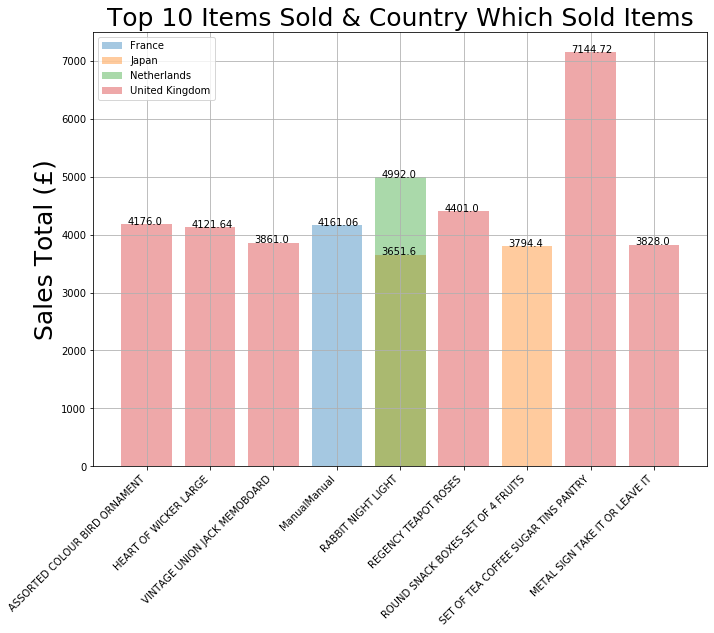

In [18]:
# grid=[x for x in Hn.loc[:,'Items'].unique()]

grid=[x for x in order_x_labs]
graphs=st_
plt.figure(figsize=(11,8))
for gg,graph in enumerate(graphs):
        plt.bar(grid,graph,label=Hn.loc[:,'Country'].unique()[gg],alpha=0.4)
                
plt.ylabel('Sales Total '+ '('+u'\u00A3'+')',size=25)
plt.title('Top 10 Items Sold & Country Which Sold Items',size=25)
plt.legend(loc="upper left")
plt.xticks(order_x_labs,rotation=45,ha="right",size=10)
plt.grid(True)

# putting labels above bars! crazyness...
for index, value in enumerate(pp[:5]):
    plt.text(index-.3,value, str(value))
for index, value in enumerate(pp[5:]):
    plt.text(index+3.7,value, str(value))

plt.show()

# `Pie Chart:`

In [19]:
sales_tots=list(retail_sales_cleaned.loc[:,['Country','Sales_Total']].\
     groupby(['Country']).sum()['Sales_Total'])

sales_round=[]
for i in sales_tots:
    sales_round.append(round(i,2))
sales_round[:5]
retail_sales_cleaned['Country'].unique()[:10]
retail_sales_cleaned.loc[:,['Country','Sales_Total']].\
     groupby(['Country']).sum()

,Sales_Total
Country,
Australia,1.369199e+05
Austria,1.019868e+04
Bahrain,5.484000e+02
Belgium,4.093869e+04
Brazil,1.143600e+03
Canada,3.666380e+03
Channel Islands,2.014754e+04
Cyprus,1.275956e+04
Czech Republic,7.509800e+02


In [20]:
sales_tots=retail_sales_cleaned.loc[:,['Country','Sales_Total']].\
     groupby(['Country']).sum()
 
# sales_tots
# my_st=pd.DataFrame(countries_sales,columns=['Sales','Country']).sort_values('Sales',ascending=False)[:10]

p=list(zip(sales_tots.index,sales_tots['Sales_Total']))
ii=pd.DataFrame(p,columns=['Country','Sales']).sort_values('Sales',ascending=False)[:10]

In [21]:

oo=round(sum(ii['Sales'])/sum(retail_sales_cleaned['Sales_Total'])*100,3)
print('The Top 10 Countries make up only: %.2f percent of total sales'%oo)


The Top 10 Countries make up only: 96.93 percent of total sales


<Figure size 792x792 with 0 Axes>

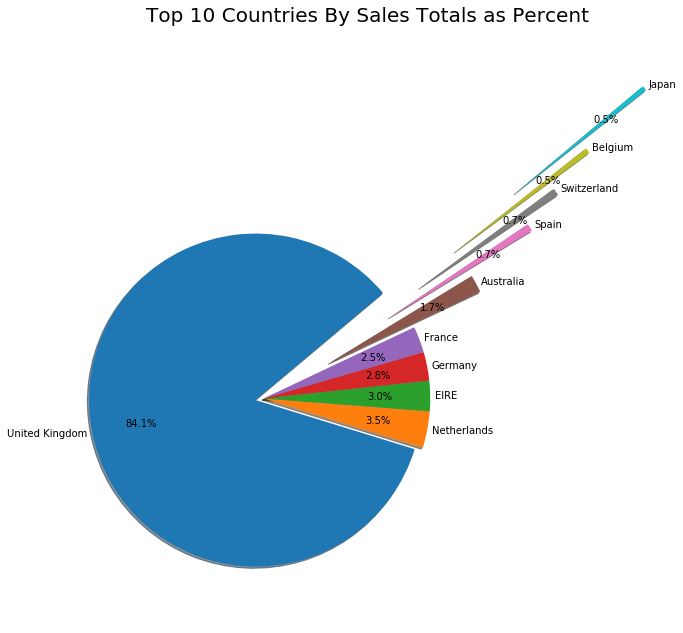

In [22]:
plt.figure(figsize=(11,11))

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ii['Country']
sizes = ii['Sales']
explode = (0.1, 0,0, 0,0,0.9,1.8,2.3,2.9,3.9)

fig1, ax1 = plt.subplots(figsize=(11,11))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',explode=explode,
        shadow=True, startangle=40,radius=2,labeldistance = 1.03,pctdistance=.7)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Top 10 Countries By Sales Totals as Percent',size=20)
plt.show()

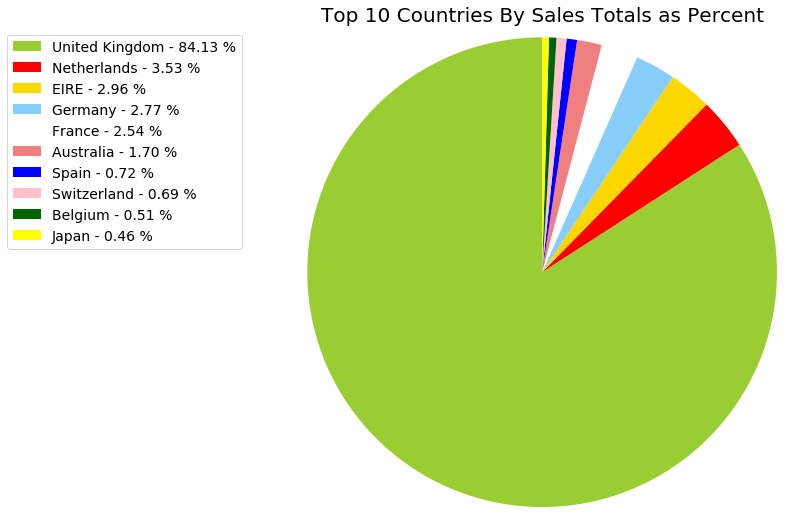

In [23]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.figure(figsize=(9,9))
x = ii['Country']
y = ii['Sales']
colors = ['yellowgreen','red','gold','lightskyblue','white','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan']
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, bbox_to_anchor=(-0.1, 1.),
           fontsize=14)
plt.title('Top 10 Countries By Sales Totals as Percent',size=20)
plt.show()
# plt.savefig('piechart.png', bbox_inches='tight')

# <font color=red>Like</font>,Share &

# <font color=red>SUB</font>scribe

**`Help Support the Channel: Buy Me A Coffee @mrfugudatasci`**

# `Citations & Help:`

# ◔̯◔

`Various Plotting Aids:`

https://jakevdp.github.io/PythonDataScienceHandbook/04.03-errorbars.html

https://realpython.com/pandas-plot-python/

http://aeturrell.com/2018/01/31/publication-quality-plots-in-python/

http://www.jesshamrick.com/2016/04/13/reproducible-plots/

https://www.stat.berkeley.edu/~nelle/teaching/2017-visualization/README.html

https://griddb.net/en/blog/data-visualization-with-python-matplotlib-and-griddb/

https://www.analyticsvidhya.com/blog/2020/02/beginner-guide-matplotlib-data-visualization-exploration-python/

`Pie Plot Help:`

https://stackoverflow.com/questions/23577505/how-to-avoid-overlapping-of-labels-autopct-in-a-matplotlib-pie-chart

https://indianaiproduction.com/matplotlib-pie-chart/


`Labels Above Bars in Bar Plot:`

https://pbpython.com/effective-matplotlib.html

https://stackoverflow.com/questions/62043788/add-values-above-bars-on-a-bar-chart-in-python

https://stackoverflow.com/questions/53066633/python-how-to-show-values-on-top-of-bar-plot

`Grouping & Multi-Level Dataframes:`

https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html

https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html